In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
np.random.seed(0)

**Import du Dataset**

In [4]:
data = pd.read_csv('Data_Regression/reg_simple.csv')

**Visualisation des données**

In [5]:
data.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


**Création des matrices X et y à partir des vecteurs x et y**

In [6]:
x = np.array(data.heure_rev)
y = np.array(data.note)

In [7]:
x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)
print(x.shape)
print(y.shape)

(27, 1)
(27, 1)


In [8]:
X = np.hstack((x,np.ones(x.shape)))

In [9]:
X.shape

(27, 2)

**Création d'un théta aléatoire**

In [10]:
theta = np.random.randn(2,1)
theta

array([[1.76405235],
       [0.40015721]])

**Création du modèle**

In [11]:
def model(X, theta):
    return X.dot(theta)

**Visualisation du modèle par rapport au dataset**

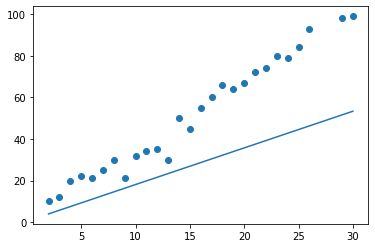

In [12]:
plt.scatter(x,y)
plt.plot(x,model(X, theta))

**Définition et calcul de notre fonction Coût**

In [13]:
def fonction_cout(X, theta, y):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) 

fonction_cout(X, theta, y)

376.1911774975494

**Définition et calcul du gradient**

In [14]:
def gradient(X, theta, y):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [15]:
gradient(X, theta, y)

array([[-464.18503787],
       [ -23.91475355]])

**Définition et calcul de notre descente de gradient**

Minimisation de notre fonction coût en entrainant le modèle

In [16]:
def descente_gradient(X, theta, y, alpha, n_iterations):
    cost = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - alpha*gradient(X, theta, y)
        cost[i] = fonction_cout(X, theta, y)
    return theta, cost

**Nouveau théta**

In [17]:
nouveau_theta = descente_gradient(X, theta, y, 0.001, 1000)[0]

**Visualisation du modèle par rapport à notre dataset après entrainement**

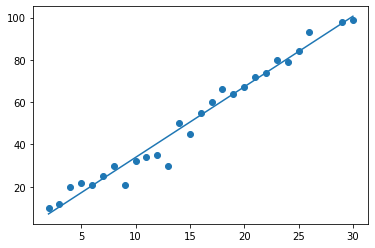

In [18]:
plt.scatter(x,y)
plt.plot(x, model(X, nouveau_theta))

**Définition et calcul du coeff de détermination**

In [19]:
def coef_determination(X, theta, y):
    u = ((y - model(X, nouveau_theta))**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [20]:
coef_determination(X, nouveau_theta, y)

0.9733198927902368

**Fonction coût au cours des itérations**

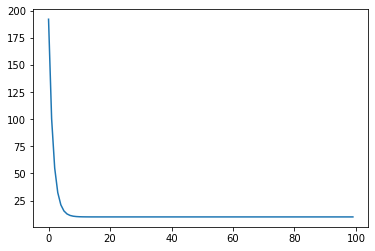

In [21]:
cost_history = np.array(descente_gradient(X, theta, y, 0.001, 100)[1])
plt.plot(range(len(cost_history)), cost_history)

## Avec Scikit Learn :

In [34]:
data.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [35]:
data.shape

(27, 2)

In [36]:
X = np.array(data.heure_rev)
Y = np.array(data.note)

X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

print(X.shape)
print(Y.shape)

(27, 1)
(27, 1)


In [38]:
model = LinearRegression()
model.fit(X, Y)

prediction = model.predict(X)

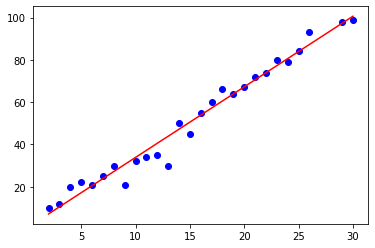

In [39]:
plt.scatter(X,Y, c='b')
plt.plot(X, prediction, c='r')

In [40]:
model.score(X,Y)

0.9733203596683907

In [41]:
erreur_quad = mean_squared_error(Y,prediction)
print(erreur_quad)

19.775505697098875
